<a href="https://colab.research.google.com/github/weiweishui/miniprogram-1/blob/main/Vix%2BTSLA%2Bsoxx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 3.0 MB/s eta 0:00:00


/tmp/ipython-input-3297736685.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download([target_stock, benchmark_etf, volatility_idx], period="2y")['Close']
[*********************100%***********************]  3 of 3 completed
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2023-12-29   2023-12-29
End Period                 2025-12-26   2025-12-26
Risk-Free Rate             0.0%         0.0%
Time in Market             26.0%        100.0%

Cumulative Return          -100.0%      87.69%
CAGR﹪                     -100.0%      37.34%

Sharpe                     -0.49        0.81
Prob. Sharpe Ratio         15.69%       87.72%
Smart Sharpe               -0.48        0.8
Sortino                    -0.49        1.27
Smart Sortino              -0.49        1.25
Sortino/√2                 -0.35        0.9
Smart Sortino/√2           -0.34        0.88
Omega                      1.15         1.15

Max Drawdown               -100.0%      -53.77%
Max DD Date                2024-07-09   2025-04-08
Max DD Period Start        2024-06-20   2024-12-18
Max DD Period End          2025-12-26   2025-12-15
Longest DD Days            555          363
Volat

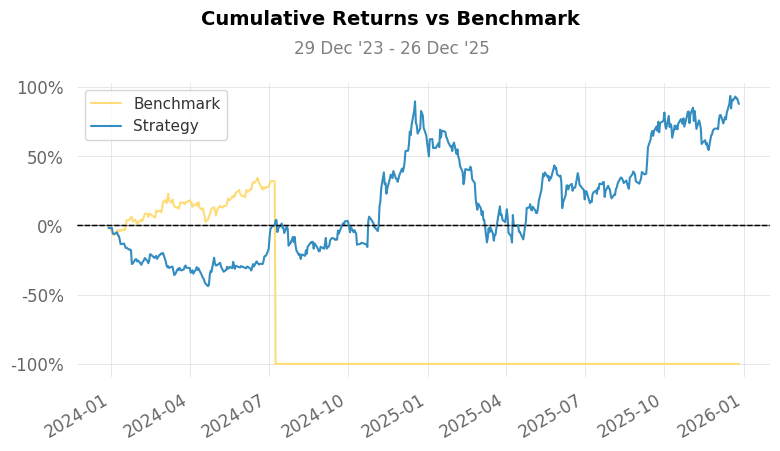

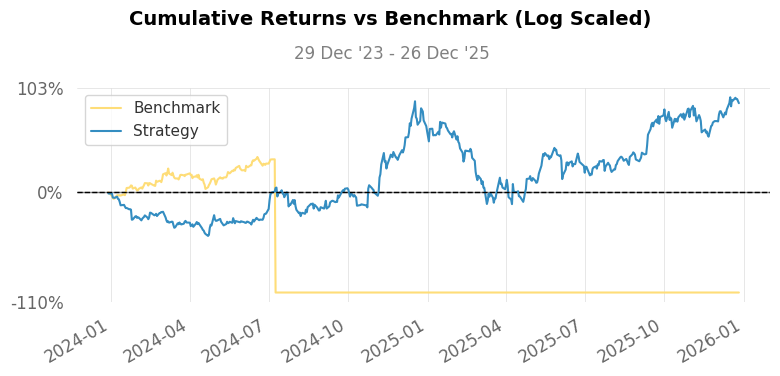

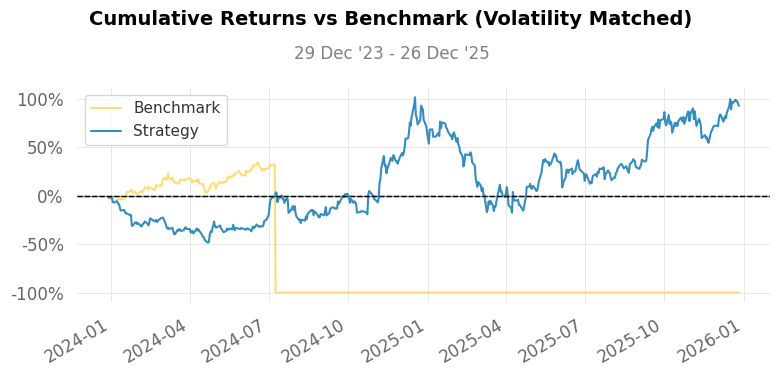

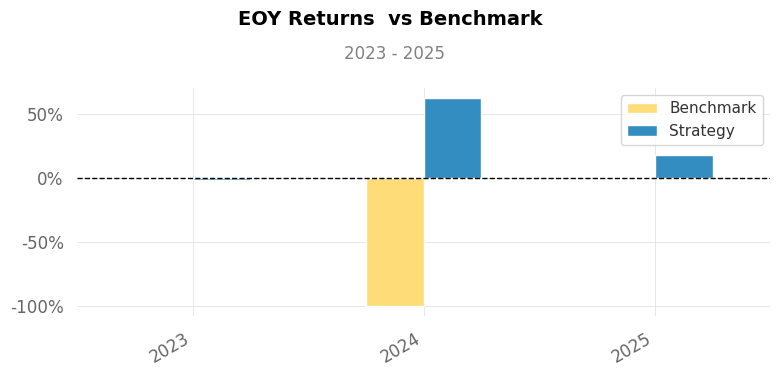

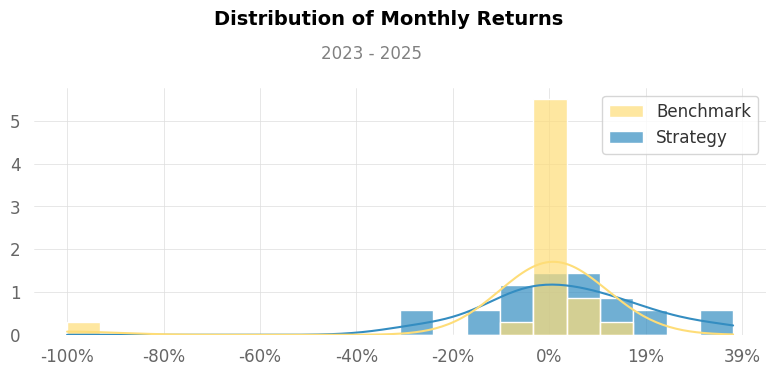

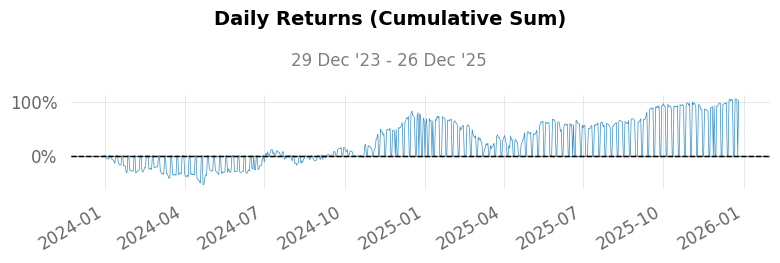

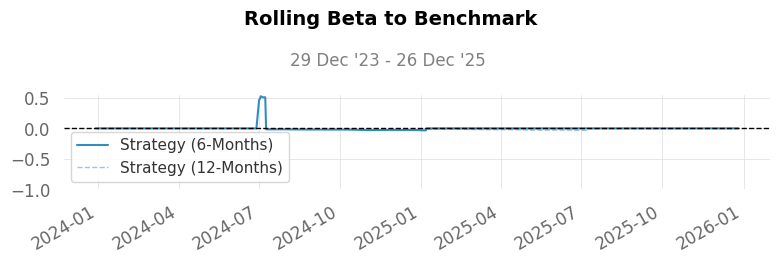

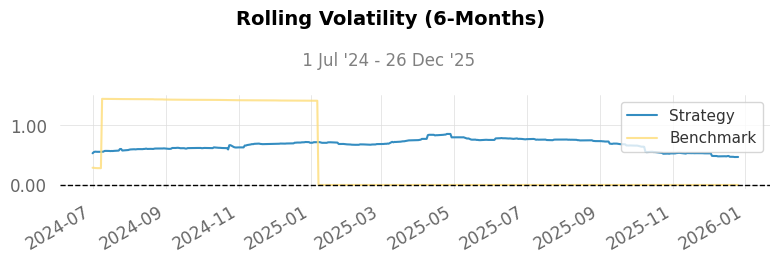

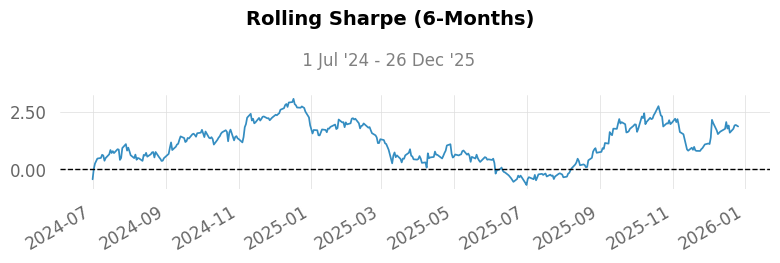

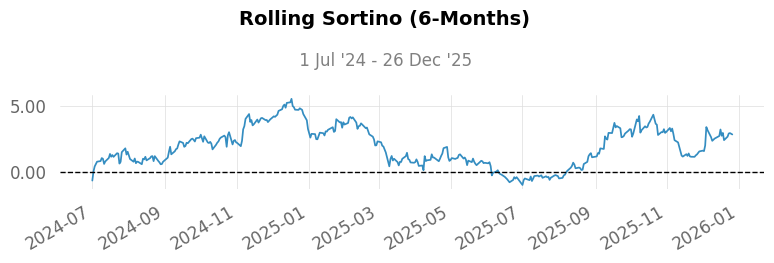

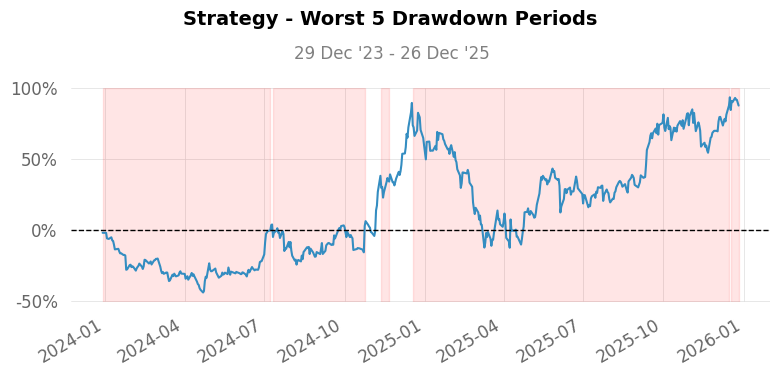

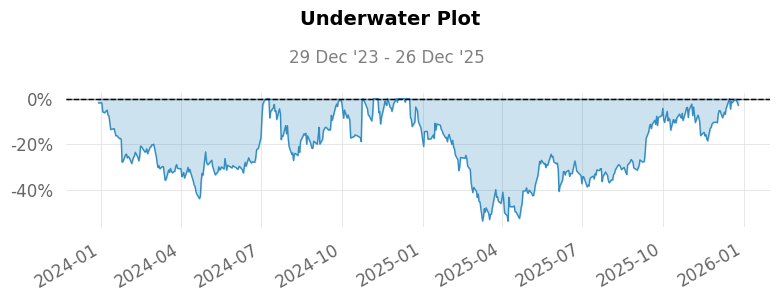

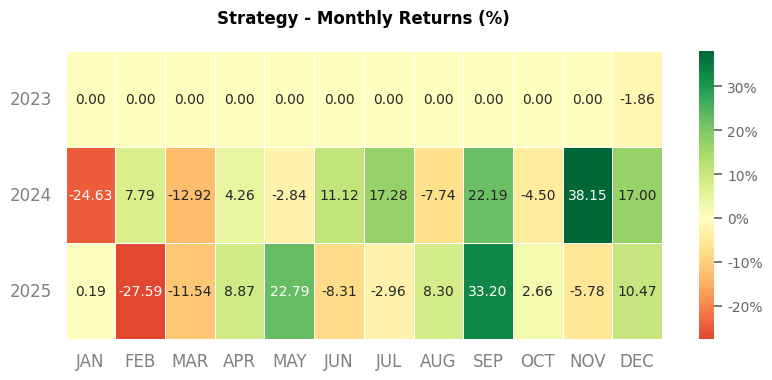

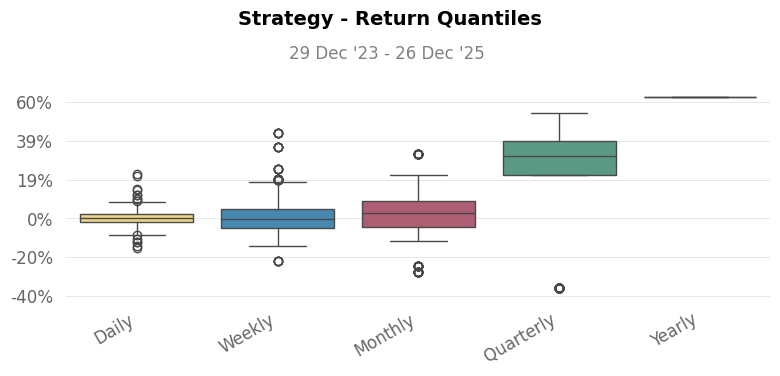

In [1]:
# 1. 安装专业的量化库
!pip install yfinance quantstats -q

import yfinance as yf
import quantstats as qs

# 2. 定义你想研究的对象
# ^VIX 是恐慌指数, TSLA 是特斯拉, SOXX 是半导体 ETF
target_stock = 'TSLA'
benchmark_etf = 'SOXX'
volatility_idx = '^VIX'

# 3. 抓取数据
data = yf.download([target_stock, benchmark_etf, volatility_idx], period="2y")['Close']

# 4. 一键生成对比报告
# 我们来看看 TSLA 和 半导体板块 (SOXX) 的相关性
qs.reports.full(data[target_stock], data[benchmark_etf])

# 根据报告，特斯拉 (TSLA) 和半导体 ETF (SOXX) 之间的相关性为 -1.55%。
# 这意味着它们之间的线性关系非常弱，几乎可以忽略不计，走势上略微呈现负相关性。

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 重新定义标的
assets = ['TSLA', 'SOXX', '^VIX']

# 下载数据
df = yf.download(assets, period="2y")['Close']

# 检查数据是否有缺失（这是修复的第一步）
print("数据缺失检查：")
print(df.isnull().sum())

# 展示前 5 行，看看 VIX 和其他两个的价格量级差异
print("\n数据预览：")
print(df.tail())

/tmp/ipython-input-4291189673.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(assets, period="2y")['Close']
[*********************100%***********************]  3 of 3 completed

数据缺失检查：
Ticker
SOXX    1
TSLA    1
^VIX    0
dtype: int64

数据预览：
Ticker            SOXX        TSLA   ^VIX
Date                                     
2025-12-19  299.809998  481.200012  14.91
2025-12-22  303.839996  488.730011  14.08
2025-12-23  304.959991  485.559998  14.00
2025-12-24  306.140015  485.399994  13.47
2025-12-26  306.040009  475.190002  13.60


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas

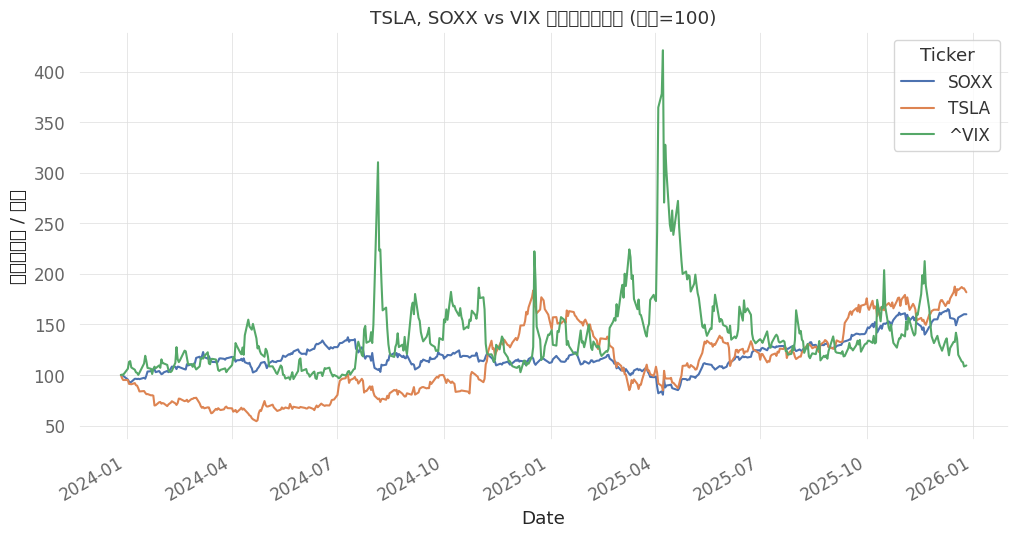


每日收益率相关性矩阵：
Ticker      SOXX     TSLA      ^VIX
Ticker                             
SOXX    1.000000  0.51375 -0.645563
TSLA    0.513750  1.00000 -0.474690
^VIX   -0.645563 -0.47469  1.000000


In [8]:
# 1. 处理缺失值
df_clean = df.dropna()

# 2. 归一化处理：让所有数据从 100 开始
df_norm = (df_clean / df_clean.iloc[0]) * 100

# 3. 绘图对比
plt.figure(figsize=(12, 6))
df_norm.plot(ax=plt.gca())
plt.title("TSLA, SOXX vs VIX 归一化走势对比 (起点=100)")
plt.ylabel("标准化价格 / 点数")
plt.grid(True)
plt.show()

# 4. 计算每日收益率的相关性 (Pearson Correlation)
returns_corr = df_clean.pct_change().corr()
print("\n每日收益率相关性矩阵：")
print(returns_corr)